Credit Card Fraud Detection System Using Machine Learning models

Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve,accuracy_score
from imblearn.over_sampling import SMOTE

Loading The Data

In [3]:
path="/content/drive/MyDrive/Datasets/creditcard.csv"
df=pd.read_csv(path)
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


EDA

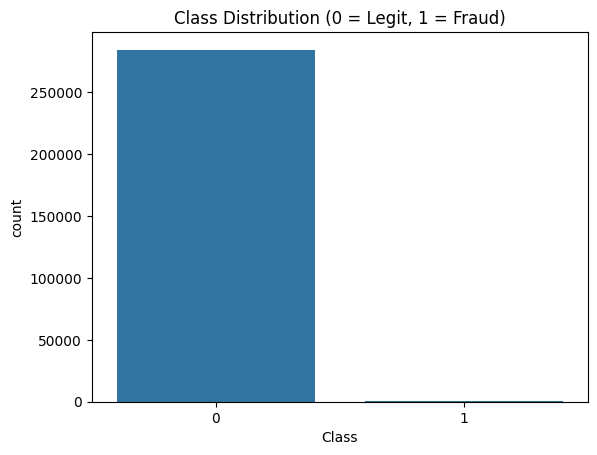

Fraud Percentage: 0.1727%


In [7]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()
fraud_percentage = df["Class"].mean() * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

HeatMap

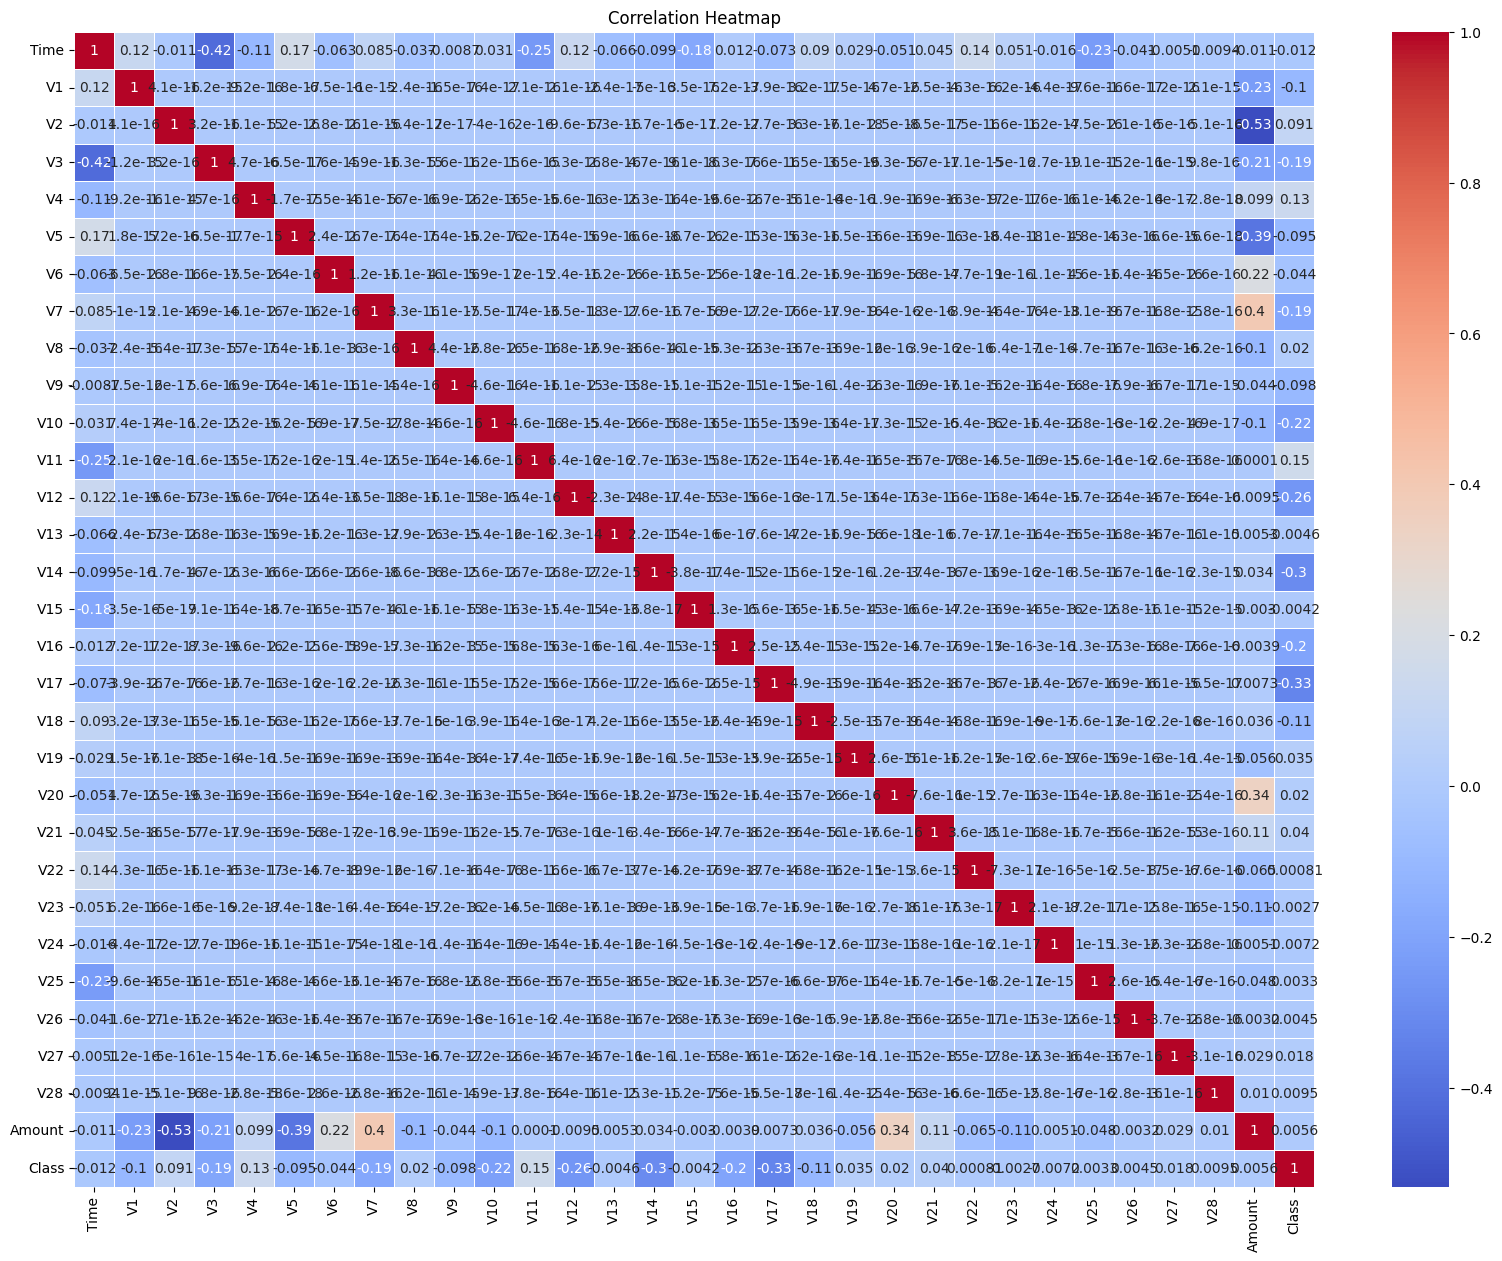

In [5]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Of Features With Class

/tmp/ipython-input-703583892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_corr.values, y=class_corr.index, palette="coolwarm")


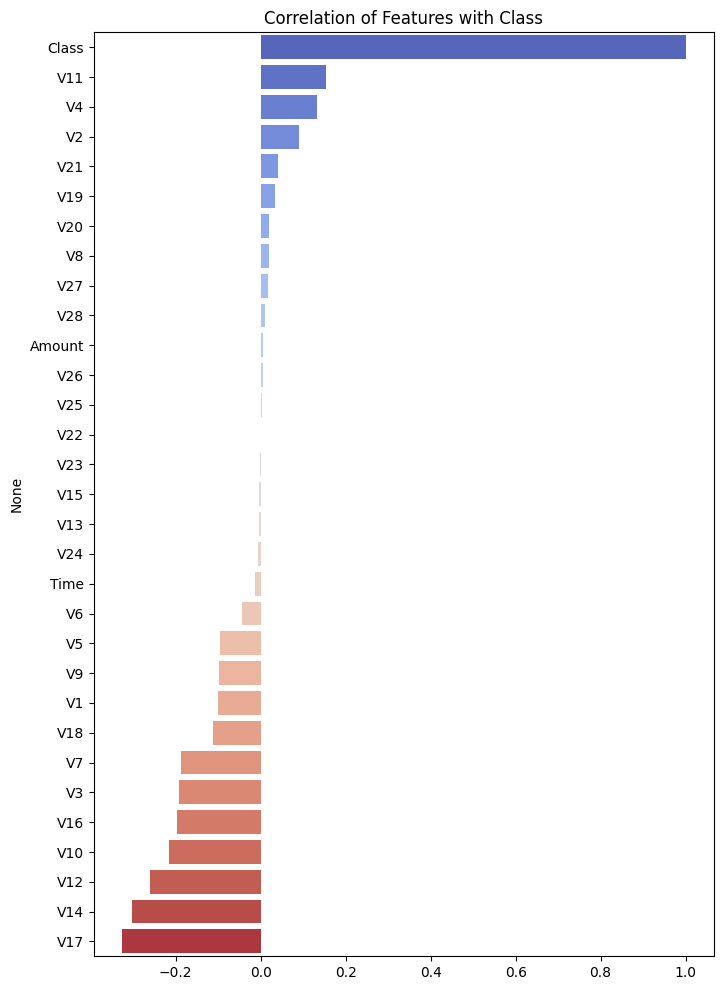

In [8]:
class_corr = corr["Class"].sort_values(ascending=False)

plt.figure(figsize=(8,12))
sns.barplot(x=class_corr.values, y=class_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Class")
plt.show()

Data Preprocessing

In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", X_train_res.shape, y_train_res.shape)

Training set: (199364, 30) Testing set: (85443, 30)
After SMOTE: (398040, 30) (398040,)


Logistic Regression

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9776459159907774
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



XGBoost

In [17]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:41:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9991807403766253
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.80      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Comparision

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.977646   0.064293  0.878378  0.119816  0.967001
1        Random Forest  0.999462   0.892308  0.783784  0.834532  0.962474
2              XGBoost  0.999181   0.743750  0.804054  0.772727  0.973827


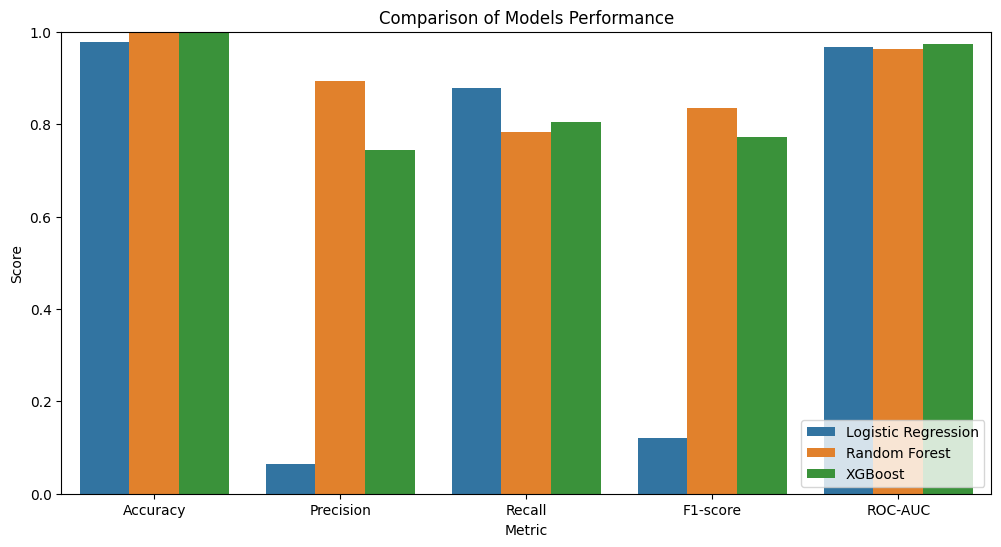

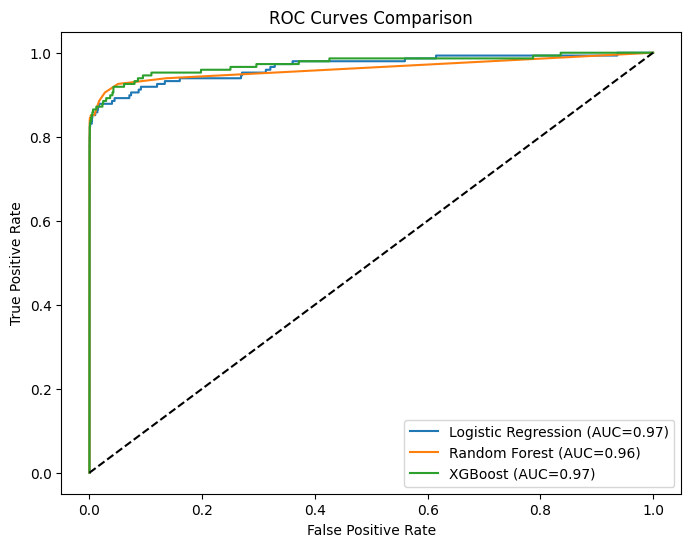

In [26]:
# Ensure all models have 3 items: (y_test, y_pred, y_prob)
models = {
    "Logistic Regression": (
        y_test,
        y_pred_lr,
        lr.predict_proba(X_test)[:, 1]   # probability of class 1
    ),
    "Random Forest": (
        y_test,
        y_pred_rf,
        rf.predict_proba(X_test)[:, 1]
    ),
    "XGBoost": (
        y_test,
        y_pred_xgb,
        y_prob_xgb
    )
}

results = []

for name, (yt, yp, ypr) in models.items():
    report = classification_report(yt, yp, output_dict=True)
    auc = roc_auc_score(yt, ypr)
    acc = accuracy_score(yt, yp)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"],
        "ROC-AUC": auc
    })

df_results = pd.DataFrame(results)
print(df_results)

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

plt.figure(figsize=(12, 6))
df_melted = df_results.melt(id_vars="Model", value_vars=metrics,
                            var_name="Metric", value_name="Score")
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")
plt.title("Comparison of Models Performance")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
for name, (yt, yp, ypr) in models.items():
    fpr, tpr, _ = roc_curve(yt, ypr)
    auc = roc_auc_score(yt, ypr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()
